In [1]:
import uproot
import h5py
import numpy as np
import os
import fnmatch
import awkward as ak

In [2]:
dir_h5_mc16 = '/eos/user/m/malgren/ftag_data/'

In [3]:
!ls $dir_h5_mc16

eval_data.pth			     FTAG2_ttbar_PowHW7_merged.h5
FTAG2_ttbar_PhPy8_nominal_merged.h5


In [4]:
ff = h5py.File(os.path.join(dir_h5_mc16,'FTAG2_ttbar_PowHW7_merged.h5'))

In [5]:
ff

<HDF5 file "FTAG2_ttbar_PowHW7_merged.h5" (mode r)>

In [6]:
ff.keys()

<KeysViewHDF5 ['df']>

In [7]:
df = ff.get('df')

In [8]:
df.keys()

<KeysViewHDF5 ['axis0', 'axis1', 'block0_items', 'block0_values', 'block1_items', 'block1_values', 'block2_items', 'block2_values']>

In [9]:
dir_root_mc20 = '/eos/atlas/unpledged/group-tokyo/users/wojang/qt/wonho_samples_run2'

In [10]:
!ls $dir_root_mc20 | head

user.wojang.345705.Sherpa.DAOD_PHYS.e6213_s3681_r13144_p5631.AT24.2.4_2023.07.01_mc20d_v1_output_root.txt
user.wojang.345705.Sherpa.DAOD_PHYS.e6213_s3681_r13145_p5631.AT24.2.4_2023.06.27_mc20e_v4_output_root.txt
user.wojang.345705.Sherpa.DAOD_PHYS.e6213_s3681_r13167_p5631.AT24.2.4_2023.06.29_mc20a_v1_output_root.txt
user.wojang.345706.Sherpa.DAOD_PHYS.e6213_s3681_r13144_p5631.AT24.2.4_2023.07.01_mc20d_v1_output_root.txt
user.wojang.345706.Sherpa.DAOD_PHYS.e6213_s3681_r13145_p5631.AT24.2.4_2023.06.27_mc20e_v4_output_root.txt
user.wojang.345706.Sherpa.DAOD_PHYS.e6213_s3681_r13167_p5631.AT24.2.4_2023.06.29_mc20a_v1_output_root.txt
user.wojang.345718.Sherpa.DAOD_PHYS.e6525_s3681_r13144_p5631.AT24.2.4_2023.07.01_mc20d_v1_output_root.txt
user.wojang.345718.Sherpa.DAOD_PHYS.e6525_s3681_r13145_p5631.AT24.2.4_2023.06.27_mc20e_v4_output_root.txt
user.wojang.345718.Sherpa.DAOD_PHYS.e6525_s3681_r13167_p5631.AT24.2.4_2023.06.29_mc20a_v1_output_root.txt
user.wojang.345723.Sherpa.DAOD_PHYS.e6213_s368

In [11]:
os.listdir(dir_root_mc20).sort()

In [12]:
fname = os.listdir(dir_root_mc20)[0]

In [13]:
fname

'user.wojang.345705.Sherpa.DAOD_PHYS.e6213_s3681_r13144_p5631.AT24.2.4_2023.07.01_mc20d_v1_output_root.txt'

In [14]:
feature_names = []

In [15]:
def read_example_file(dir_path):
    fname = os.listdir(dir_path)[0]
    tree = uproot.open(os.path.join(dir_path,fname)+':nominal')
    pu = ak.to_numpy(ak.flatten(tree['jet_GN2_pu'].array()))
    pb = ak.to_numpy(ak.flatten(tree['jet_GN2_pb'].array()))
    pc = ak.to_numpy(ak.flatten(tree['jet_GN2_pc'].array()))
    return pu, pb, pc

In [16]:
dir_root_lightjet = '/eos/atlas/atlascerngroupdisk/perf-flavtag/calib/negtag/Rel24_GN2/mc20_Run2/Ntuples/PeriodE/ZJets_MG'

In [17]:
!ls $dir_root_lightjet | head

user.ltoffoli.mc20_13TeV.506193.MGPy8EG_3jets_HT2bias_BFilter.deriv.DAOD_PHYS.e8382_s3681_r13145_p5631.toffoGN2_v1_output.root
user.ltoffoli.mc20_13TeV.506194.MGPy8EG_HT2bias_CFilterBVeto.deriv.DAOD_PHYS.e8382_s3681_r13145_p5631.toffoGN2_v1_output.root
user.ltoffoli.mc20_13TeV.506195.MGPy8EG_HT2bias_CVetoBVeto.deriv.DAOD_PHYS.e8382_s3681_r13145_p5631.toffoGN2_v1_output.root
user.ltoffoli.mc20_13TeV.506196.MGPy8EG_3jets_HT2bias_BFilter.deriv.DAOD_PHYS.e8382_s3681_r13145_p5631.toffoGN2_v1_output.root
user.ltoffoli.mc20_13TeV.506197.MGPy8EG_HT2bias_CFilterBVeto.deriv.DAOD_PHYS.e8382_s3681_r13145_p5631.toffoGN2_v1_output.root
user.ltoffoli.mc20_13TeV.506198.MGPy8EG_HT2bias_CVetoBVeto.deriv.DAOD_PHYS.e8382_s3681_r13145_p5631.toffoGN2_v1_output.root
user.ltoffoli.mc20_13TeV.512198.MGPy8EG_3jets_HT2bias_BFilter.deriv.DAOD_PHYS.e8382_s3681_r13145_p5631.toffoGN2_v1_output.root
user.ltoffoli.mc20_13TeV.512199.MGPy8EG_HT2bias_CFilterBVeto.deriv.DAOD_PHYS.e8382_s3681_r13145_p5631.toffoGN2_v1_outpu

In [18]:
subdir = os.listdir(dir_root_lightjet)[1]

In [19]:
subdir

'user.ltoffoli.mc20_13TeV.506194.MGPy8EG_HT2bias_CFilterBVeto.deriv.DAOD_PHYS.e8382_s3681_r13145_p5631.toffoGN2_v1_output.root'

In [20]:
lightjet_dir_mc = os.path.join(dir_root_lightjet,subdir)

In [21]:
pu_mc, pb_mc, pc_mc = read_example_file(lightjet_dir_mc)

In [22]:
fname = os.listdir(os.path.join(dir_root_lightjet,subdir))[3]

In [23]:
fname

'user.ltoffoli.35090070._000004.output.root'

In [24]:
os.path.join(dir_root_lightjet,subdir,fname)

'/eos/atlas/atlascerngroupdisk/perf-flavtag/calib/negtag/Rel24_GN2/mc20_Run2/Ntuples/PeriodE/ZJets_MG/user.ltoffoli.mc20_13TeV.506194.MGPy8EG_HT2bias_CFilterBVeto.deriv.DAOD_PHYS.e8382_s3681_r13145_p5631.toffoGN2_v1_output.root/user.ltoffoli.35090070._000004.output.root'

In [25]:
tree = uproot.open(os.path.join(dir_root_lightjet,subdir,fname)+':nominal')

In [26]:
tree.keys()

['mc_generator_weights',
 'weight_mc',
 'weight_pileup',
 'weight_beamspot',
 'weight_leptonSF',
 'weight_trigger',
 'weight_jvt',
 'weight_pileup_UP',
 'weight_pileup_DOWN',
 'weight_leptonSF_EL_SF_Reco_UP',
 'weight_leptonSF_EL_SF_Reco_DOWN',
 'weight_leptonSF_EL_SF_ID_UP',
 'weight_leptonSF_EL_SF_ID_DOWN',
 'weight_leptonSF_EL_SF_Isol_UP',
 'weight_leptonSF_EL_SF_Isol_DOWN',
 'weight_trigger_EL_SF_Trigger_UP',
 'weight_trigger_EL_SF_Trigger_DOWN',
 'weight_trigger_MU_SF_STAT_UP',
 'weight_trigger_MU_SF_STAT_DOWN',
 'weight_trigger_MU_SF_SYST_UP',
 'weight_trigger_MU_SF_SYST_DOWN',
 'weight_leptonSF_MU_SF_ID_STAT_UP',
 'weight_leptonSF_MU_SF_ID_STAT_DOWN',
 'weight_leptonSF_MU_SF_ID_STAT_LOWPT_UP',
 'weight_leptonSF_MU_SF_ID_STAT_LOWPT_DOWN',
 'weight_leptonSF_MU_SF_ID_SYST_LOWPT_UP',
 'weight_leptonSF_MU_SF_ID_SYST_LOWPT_DOWN',
 'weight_leptonSF_MU_SF_ID_SYST_UP',
 'weight_leptonSF_MU_SF_ID_SYST_DOWN',
 'weight_leptonSF_MU_SF_Isol_STAT_UP',
 'weight_leptonSF_MU_SF_Isol_STAT_DOWN',
 

In [27]:
tree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
mc_generator_weights | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
weight_mc            | float                    | AsDtype('>f4')
weight_pileup        | float                    | AsDtype('>f4')
weight_beamspot      | float                    | AsDtype('>f4')
weight_leptonSF      | float                    | AsDtype('>f4')
weight_trigger       | float                    | AsDtype('>f4')
weight_jvt           | float                    | AsDtype('>f4')
weight_pileup_UP     | float                    | AsDtype('>f4')
weight_pileup_DOWN   | float                    | AsDtype('>f4')
weight_leptonSF_E... | float                    | AsDtype('>f4')
weight_leptonSF_E... | float                    | AsDtype('>f4')
weight_leptonSF_E... | float                    | AsDtype('>f4')
weight_leptonSF_E... | float              

In [28]:
el_pt = tree['el_pt'].array()[:2]

In [29]:
el_pt[0]

<Array [9.26e+04, 2.61e+04] type='2 * float32'>

In [30]:
el_e = tree['el_e'].array()[:2]

In [31]:
el_pt**2

<Array [[8.57e+09, 6.82e+08, ... 1.64e+09]] type='2 * var * float32'>

In [32]:
el_e**2

<Array [[1.12e+10, 1.32e+10, ... 1.65e+09]] type='2 * var * float32'>

In [33]:
(el_e**2)[0]

<Array [1.12e+10, 1.32e+10] type='2 * float32'>

In [34]:
samples = tree.arrays(['el_e','mu_e','el_charge','mu_charge','el_pt','mu_pt', 'el_phi','mu_phi',\
                      'el_eta', 'mu_eta', 'jet_e'])

In [35]:
el_pt = tree['el_pt'].array()[:2]

In [36]:
el_eta = tree['el_eta'].array()[:2]

In [37]:
el_px = el_pt*np.cos(el_eta)

In [38]:
el_px

<Array [[7.98e+04, -1.45e+04, ... 4.05e+04]] type='2 * var * float32'>

In [39]:
el_pt[0]

<Array [9.26e+04, 2.61e+04] type='2 * float32'>

In [40]:
el_eta[0]

<Array [0.532, 2.16] type='2 * float32'>

In [41]:
el_px[0]

<Array [7.98e+04, -1.45e+04] type='2 * float32'>

In [42]:
9.26e+04 * np.cos(0.532)

79802.15022547604

In [43]:
2.61e+04 * np.cos(2.16)

-14503.74771714099

In [44]:
samples.el_pt * np.cos(samples.el_eta)

<Array [[7.98e+04, -1.45e+04, ... -1.34e+04]] type='1781907 * var * float32'>

In [45]:
samples['el_e'][:2]

<Array [[1.06e+05, 1.15e+05, ... 4.06e+04]] type='2 * var * float32'>

In [46]:
samples['el_e'][0]

<Array [1.06e+05, 1.15e+05] type='2 * float32'>

In [47]:
samples['mu_charge']

<Array [[], [], [], [], ... [], [], [], []] type='1781907 * var * float32'>

In [48]:
ak.sum(samples['mu_charge'],axis=1) == 0

<Array [True, True, True, ... True, True, True] type='1781907 * bool'>

In [49]:
samples['el_charge']

<Array [[1, -1], [-1, 1], ... [-1, 1], [1, -1]] type='1781907 * var * float32'>

In [50]:
ak.sum(samples['el_charge'],axis=1) == 0

<Array [True, True, True, ... True, True, True] type='1781907 * bool'>

In [51]:
type(samples)

awkward.highlevel.Array

In [52]:
sum(ak.num(samples['mu_e']) == 2)

0

In [53]:
mask = (ak.num(samples['el_e']) == 2) | (ak.num(samples['mu_e']) == 2) & (ak.num(samples['mu_e']) + ak.num(samples['el_e']) == 2)

In [54]:
mask2e2mu = (ak.num(samples['el_e']) == 2) & (ak.num(samples['mu_e']) == 2)

In [55]:
sum(mask2e2mu)

0

In [56]:
mask_test = mask[:5]

In [57]:
mask_test2 = mask[10:15]

In [58]:
mask_test

<Array [True, True, True, True, True] type='5 * bool'>

In [59]:
mask_test2

<Array [True, True, True, True, True] type='5 * bool'>

In [60]:
mask_test * [False, True, True, False, True]

<Array [False, True, True, False, True] type='5 * bool'>

In [61]:
mask_test & [False, True, True, False, True]

<Array [False, True, True, False, True] type='5 * bool'>

In [62]:
sum(ak.num(samples['jet_e']) >= 1)

1571855

In [63]:
ak.num(tree['mu_e'])

<Array [] type='0 * int64'>

In [64]:
el_e = tree['el_e'].array()

In [65]:
dir(el_e)

['Mask',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__self_class__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__thisclass__',
 '_behavior',
 '_caches',
 '_layout',
 '_numbaview',
 'behavior',
 'caches',
 'fields',
 'layout',
 'mask',
 'nbytes',
 'ndim',
 'numba_type',
 'slot0',
 'slot1',
 'slot2',
 'slot3',
 'slot4',
 'slot5',
 'slot6',
 'slot7',
 'slot8',
 'slot9',
 'to_list',
 'to_numpy',
 'tolist',
 'type']

In [66]:
sum(ak.num(el_e) == 1)

0

In [67]:
ak.num?

In [68]:
el_e[1]

<Array [7.54e+04, 4.06e+04] type='2 * float32'>

In [69]:
jet_pt = tree['jet_pt'].array()

In [70]:
pu_mc = tree['jet_GN2_pu'].array()

In [71]:
pu_mc[:2].to_list()

[[0.49934813380241394, 0.8188640475273132],
 [0.7142797708511353, 0.5459355115890503]]

In [72]:
pu_mc = ak.flatten(pu_mc)

In [73]:
pu_mc = ak.to_numpy(pu_mc)

In [74]:
pu_mc

array([0.49934813, 0.81886405, 0.71427977, ..., 0.8082912 , 0.66440493,
       0.41835272])

In [75]:
pb_mc = ak.to_numpy(ak.flatten(tree['jet_GN2_pb'].array()))
pc_mc = ak.to_numpy(ak.flatten(tree['jet_GN2_pc'].array()))

In [76]:
pb_mc.ndim

1

In [77]:
type(pu_mc)

numpy.ndarray

In [78]:
pu_mc.shape

(3881588,)

In [79]:
import matplotlib.pyplot as plt
from matplotlib import colors
import os
import numpy as np
import mplhep as hep

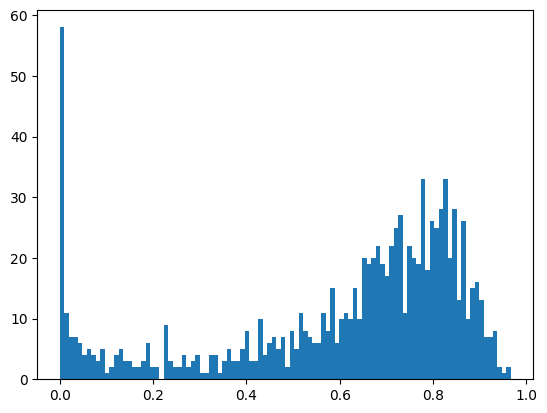

In [80]:
_ = plt.hist(pu_mc[:1000],bins=100)

In [81]:
pu_mc[:3].flatten()

array([0.49934813, 0.81886405, 0.71427977])

In [82]:
palette = ['#3E96A1', '#EC4E20', '#FF9505', '#713E5A', '#D62828', '#5F0F40']

In [83]:
def get_bg_idx(sample_names, bg_name):

    if bg_name is not None:
        return [i for (i,s) in enumerate(sample_names) if bg_name in s][0]
    else:
        return -1

In [84]:
def plot_feature_for_n_samples(data, sample_names, bins=100, xlabel='x', ylabel='fraction events', title=None, clip_outlier=False, normed=True, \
    ylogscale=True, xlim=None, plot_name='feature_hist', fig_dir=None, fig_format='.pdf', fig_size=(7,7), bg_name=None, histtype_bg='stepfilled', \
    show_plt=False, legend_outside=True):
    '''
    plots single feature distribution for multiple samples as 1D histogram
    :param data: list of J ndarrays of each N feature values
    :param bg_name: if not None, one sample will be treated as background and plotted in histtype_bg style
    '''

    # import ipdb; ipdb.set_trace()

    # if one sample is to be treated as background sample
    bg_idx = get_bg_idx(sample_names, bg_name)

    plt.style.use(hep.style.CMS)

    fig = plt.figure(figsize=(7,5))
    if ylogscale:
        plt.yscale('log')

    for i, (dat, col) in enumerate(zip(data, palette)):
        if i == bg_idx:
            plt.hist(dat, bins=bins, density=normed, alpha=0.5, histtype=histtype_bg, label=sample_names[i], color=col)
        else:
            plt.hist(dat, bins=bins, density=normed, alpha=1.0, histtype='step', label=sample_names[i], color=col)

    if xlim:
        plt.xlim(xlim)
    plt.grid()
    plt.gca().tick_params(axis='both', which='major', labelsize=14)
    plt.ylabel(ylabel, fontsize=16)
    plt.xlabel(xlabel, fontsize=16)
    if legend_outside:
        handles, labels = plt.gca().get_legend_handles_labels()
        lgd = fig.legend(handles, labels, bbox_to_anchor=(0.5,-0.1), loc="lower center", ncol=len(data), labelspacing=0.8, fontsize=16)
        bbox_extra_artists = (lgd,)
    else:
        plt.legend(loc='best', fontsize=15)
        bbox_extra_artists = None
    plt.tight_layout()
    if show_plt:
        plt.show()
    if fig_dir:
        print('writing figure to ' + os.path.join(fig_dir, plot_name + fig_format))
        fig.savefig(os.path.join(fig_dir, plot_name + fig_format), bbox_extra_artists=bbox_extra_artists, bbox_inches='tight')
    plt.close(fig)


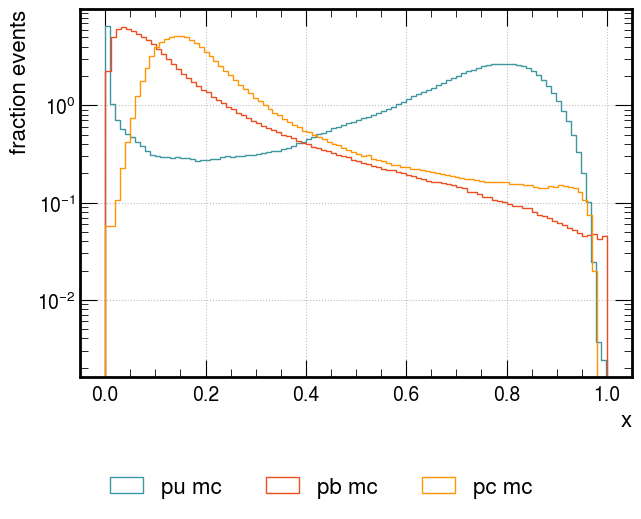

In [85]:
data = [pu_mc,pb_mc,pc_mc]
sample_names = ['pu mc','pb mc','pc mc']
plot_feature_for_n_samples(data,sample_names,show_plt=True)

In [86]:
len(pu_mc)

3881588

In [87]:
light_jet_data_dir = '/eos/atlas/atlascerngroupdisk/perf-flavtag/calib/negtag/Rel24_GN2/mc20_Run2/Ntuples/PeriodE/data/user.ltoffoli.data18_13TeV.periodAllYear.physics_Main.PhysCont.DAOD_PHYS.grp18_v01_p5631.toffoGN2_v1_output.root/'

In [88]:
!ls $light_jet_data_dir

user.ltoffoli.35091219._000001.output.root
user.ltoffoli.35091219._000002.output.root
user.ltoffoli.35091219._000003.output.root
user.ltoffoli.35091219._000004.output.root
user.ltoffoli.35091219._000005.output.root
user.ltoffoli.35091219._000006.output.root
user.ltoffoli.35091219._000007.output.root
user.ltoffoli.35091219._000008.output.root
user.ltoffoli.35091219._000009.output.root
user.ltoffoli.35091219._000010.output.root
user.ltoffoli.35091219._000011.output.root
user.ltoffoli.35091219._000012.output.root
user.ltoffoli.35091219._000013.output.root
user.ltoffoli.35091219._000014.output.root
user.ltoffoli.35091219._000015.output.root
user.ltoffoli.35091219._000016.output.root
user.ltoffoli.35091219._000017.output.root
user.ltoffoli.35091219._000018.output.root
user.ltoffoli.35091219._000019.output.root
user.ltoffoli.35091219._000020.output.root
user.ltoffoli.35091219._000021.output.root
user.ltoffoli.35091219._000022.output.root
user.ltoffoli.35091219._000023.output.root
user.ltoffo

In [89]:
fname = os.listdir(light_jet_data_dir)[0]

In [90]:
ff = uproot.open(os.path.join(light_jet_data_dir,fname))

In [91]:
tree = ff['nominal;1']

In [92]:
pu = ak.to_numpy(ak.flatten(tree['jet_GN2_pu'].array()))
pb = ak.to_numpy(ak.flatten(tree['jet_GN2_pb'].array()))
pc = ak.to_numpy(ak.flatten(tree['jet_GN2_pc'].array()))

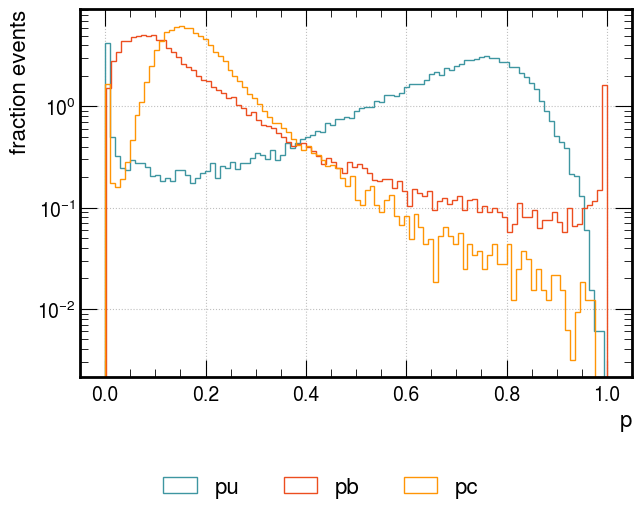

In [93]:
data = [pu,pb,pc]
sample_names = ['pu','pb','pc']
plot_feature_for_n_samples(data,sample_names,show_plt=True,xlabel='p')

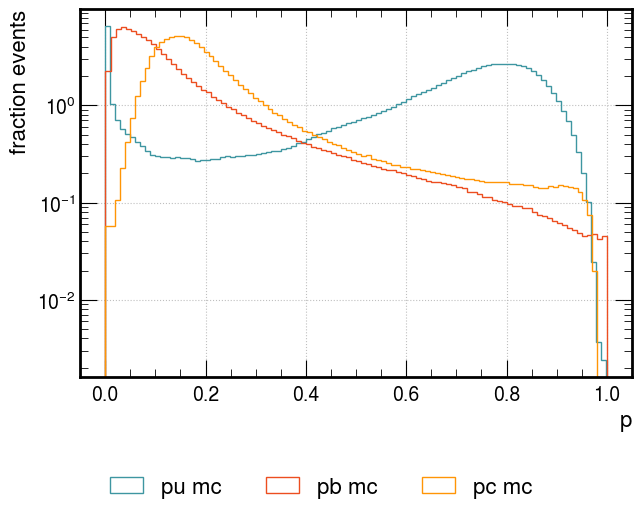

In [94]:
data = [pu_mc,pb_mc,pc_mc]
sample_names = ['pu mc','pb mc','pc mc']
plot_feature_for_n_samples(data,sample_names,show_plt=True,xlabel='p')